# Email Spam Classifier using LSTM

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,GlobalAveragePooling1D,Dropout,Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
unwanted = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

df.drop(unwanted,axis =1,inplace=True)

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

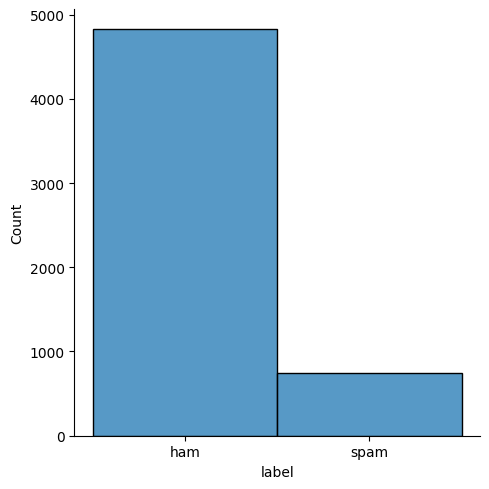

In [6]:
sns.displot(df.label)

In [7]:
# df_ham = df[df['label']=='ham']
# df_spam = df[df['label']=='spam']

In [27]:
# df_downsample = df_ham.sample(df_spam.shape[0])

In [28]:
# df = pd.concat([df_downsample,df_spam])

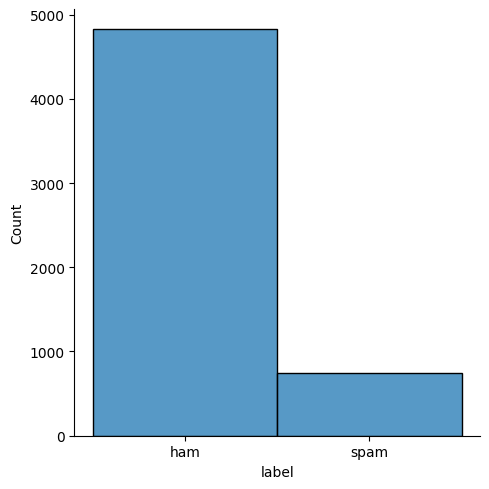

In [29]:
sns.displot(df.label)

In [30]:
import nltk
nltk.download('stopwords')

In [ ]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
import nltk
from nltk.stem.porter import PorterStemmer
import re
import string

pr = PorterStemmer()


def process_words(text):    
   
    # Removing Punctuation
    nopun = [chir for chir in text if chir not in string.punctuation]
   
    # Joining the char into words again
    nopun = ''.join(nopun)
  
    # tokenize the word
    token = nltk.word_tokenize(nopun)
 
    # find the root word  ad removing Stop words
    with_stem_words = [pr.stem(word) for word in nopun.split() if word.lower() not in stopwords.words('english')]
  
    return with_stem_words
    

In [10]:
X = df['text'].apply(process_words)

In [11]:
X

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4       [nah, dont, think, goe, usf, live, around, tho...
                              ...                        
5567    [2nd, time, tri, 2, contact, u, u, å£750, poun...
5568                       [ì, b, go, esplanad, fr, home]
5569                         [piti, mood, soani, suggest]
5570    [guy, bitch, act, like, id, interest, buy, som...
5571                                   [rofl, true, name]
Name: text, Length: 5169, dtype: object

In [12]:
y = df['label'].apply(lambda x : 1 if x=='spam' else 0 )

In [13]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Define parameters
vocab_size = 10000 # number of words in the vocabulary
max_len = 100 # maximum length of each sequence
embedding_dim = 64 # dimension of the word embeddings
oov_tok = "<OOV>" # token for out-of-vocabulary words

# Create tokenizer and fit on training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

## Saving the tokenizer for predection

In [16]:
# Save the tokenizer to a file
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # Load the tokenizer from the file
# with open('tokenizer.pkl', 'rb') as handle:
#     tokenizer = pickle.load(handle)

In [17]:
X_train

2228                                      [exact, intent]
5529                                                [one]
2149                     [waaaat, lololo, ok, next, time]
5058    [free, video, camera, phone, half, price, line...
5051    [tick, tick, tick, could, die, loneli, know, p...
                              ...                        
4740    [mani, happi, return, day, wish, happi, birthday]
474     [nice, line, said, broken, heart, plz, dont, c...
3266                        [ok, come, n, pick, u, engin]
4016    [eek, that, lot, time, especi, sinc, american,...
879     [u, secret, admir, look, 2, make, contact, ufi...
Name: text, Length: 4135, dtype: object

In [18]:

# Convert text to sequences and pad them
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')


In [19]:
X_train_seq[0]

[1253, 1926]

In [20]:
X_train_pad[0]

array([1253, 1926,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [21]:
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [22]:
X_test_pad[0]

array([   2,  492, 2495,  988,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [23]:
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                396       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                        

In [25]:
num_epochs = 20
early_stop = EarlyStopping(patience=2,verbose=1)

In [26]:
history = model.fit(X_train_pad, y_train,epochs=num_epochs,verbose=2,validation_data=(X_test_pad,y_test),callbacks=[early_stop])

Epoch 1/20
130/130 - 2s - loss: 0.4710 - accuracy: 0.8629 - val_loss: 0.3819 - val_accuracy: 0.8598 - 2s/epoch - 15ms/step
Epoch 2/20
130/130 - 1s - loss: 0.3665 - accuracy: 0.8771 - val_loss: 0.3688 - val_accuracy: 0.8598 - 693ms/epoch - 5ms/step
Epoch 3/20
130/130 - 1s - loss: 0.3345 - accuracy: 0.8771 - val_loss: 0.3097 - val_accuracy: 0.8598 - 699ms/epoch - 5ms/step
Epoch 4/20
130/130 - 1s - loss: 0.2425 - accuracy: 0.8771 - val_loss: 0.1877 - val_accuracy: 0.8598 - 710ms/epoch - 5ms/step
Epoch 5/20
130/130 - 1s - loss: 0.1566 - accuracy: 0.9105 - val_loss: 0.1505 - val_accuracy: 0.9632 - 699ms/epoch - 5ms/step
Epoch 6/20
130/130 - 1s - loss: 0.0986 - accuracy: 0.9778 - val_loss: 0.0980 - val_accuracy: 0.9758 - 681ms/epoch - 5ms/step
Epoch 7/20
130/130 - 1s - loss: 0.0636 - accuracy: 0.9836 - val_loss: 0.0710 - val_accuracy: 0.9797 - 682ms/epoch - 5ms/step
Epoch 8/20
130/130 - 1s - loss: 0.0454 - accuracy: 0.9903 - val_loss: 0.0724 - val_accuracy: 0.9816 - 668ms/epoch - 5ms/step
Ep

In [27]:
model.evaluate(X_test_pad,y_test)

33/33 [==============================] - 0s 1ms/step - loss: 0.0721 - accuracy: 0.9816


[0.07213909178972244, 0.9816247820854187]

In [28]:
# Read as a dataframe 
metrics = pd.DataFrame(history.history)

metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)

def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

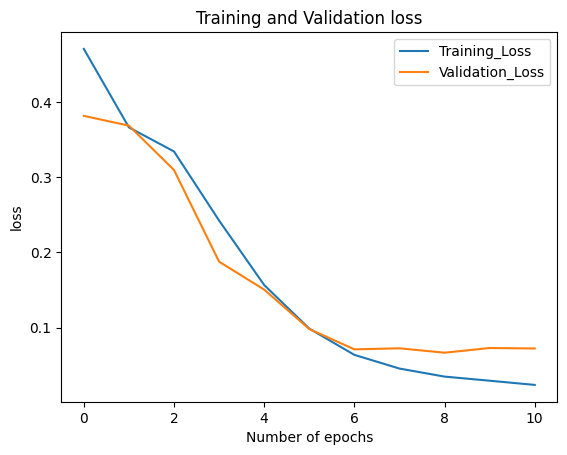

In [29]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')


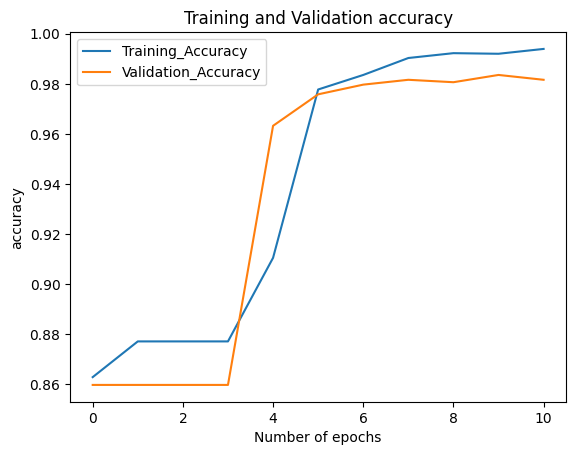

In [30]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')


### LSTM Model

In [31]:
n_lstm = 10
drop_lstm = 0.3

model1 = Sequential()
model1.add(Embedding(vocab_size, 32, input_length=max_len))
model1.add(LSTM(n_lstm,dropout=drop_lstm,return_sequences=True))
model1.add(LSTM(n_lstm,dropout=drop_lstm,return_sequences=True))
model1.add(Dense(1,activation='sigmoid'))

model1.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [32]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)


In [33]:
history = model1.fit(X_train_pad, y_train,epochs=num_epochs,verbose=2,validation_data=(X_test_pad,y_test),callbacks=[early_stop])

Epoch 1/30
130/130 - 15s - loss: 0.4421 - accuracy: 0.8608 - val_loss: 0.3925 - val_accuracy: 0.8655 - 15s/epoch - 113ms/step
Epoch 2/30
130/130 - 9s - loss: 0.2888 - accuracy: 0.9190 - val_loss: 0.1541 - val_accuracy: 0.9719 - 9s/epoch - 68ms/step
Epoch 3/30
130/130 - 8s - loss: 0.0979 - accuracy: 0.9850 - val_loss: 0.1229 - val_accuracy: 0.9729 - 8s/epoch - 58ms/step
Epoch 4/30
130/130 - 7s - loss: 0.0689 - accuracy: 0.9889 - val_loss: 0.1185 - val_accuracy: 0.9738 - 7s/epoch - 57ms/step
Epoch 5/30
130/130 - 8s - loss: 0.0469 - accuracy: 0.9927 - val_loss: 0.1142 - val_accuracy: 0.9758 - 8s/epoch - 63ms/step
Epoch 6/30
130/130 - 9s - loss: 0.0415 - accuracy: 0.9933 - val_loss: 0.1175 - val_accuracy: 0.9753 - 9s/epoch - 68ms/step
Epoch 7/30
130/130 - 10s - loss: 0.0345 - accuracy: 0.9944 - val_loss: 0.1132 - val_accuracy: 0.9769 - 10s/epoch - 73ms/step
Epoch 8/30
130/130 - 9s - loss: 0.0273 - accuracy: 0.9957 - val_loss: 0.1227 - val_accuracy: 0.9752 - 9s/epoch - 66ms/step
Epoch 9/30


In [34]:
metrics = pd.DataFrame(history.history)

metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)

def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

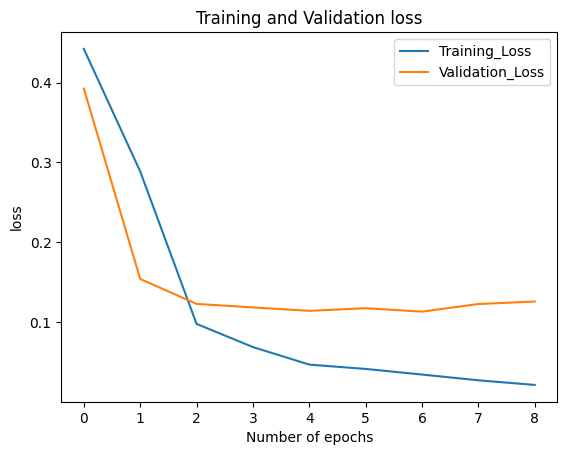

In [35]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')


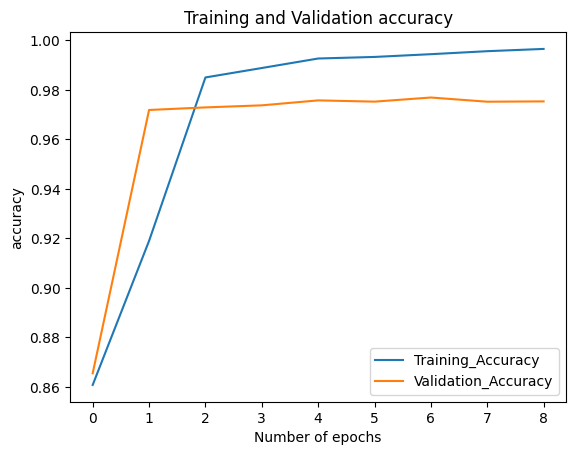

In [36]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')


## Bi LSTM

In [37]:
n_lstm = 10
drop_lstm = 0.3

model2 = Sequential()
model2.add(Embedding(vocab_size, 64, input_length=max_len))
model2.add(Bidirectional(LSTM(n_lstm,dropout=drop_lstm,return_sequences=True)))
model2.add(Bidirectional(LSTM(n_lstm,dropout=drop_lstm,return_sequences=True)))
model2.add(Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [38]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)


In [39]:
history = model2.fit(X_train_pad, y_train,epochs=num_epochs,verbose=2,validation_data=(X_test_pad,y_test),callbacks=[early_stop])

Epoch 1/30
130/130 - 19s - loss: 0.4019 - accuracy: 0.8630 - val_loss: 0.3722 - val_accuracy: 0.8711 - 19s/epoch - 144ms/step
Epoch 2/30
130/130 - 10s - loss: 0.1168 - accuracy: 0.9740 - val_loss: 0.1178 - val_accuracy: 0.9689 - 10s/epoch - 78ms/step
Epoch 3/30
130/130 - 11s - loss: 0.0422 - accuracy: 0.9934 - val_loss: 0.0970 - val_accuracy: 0.9805 - 11s/epoch - 82ms/step
Epoch 4/30
130/130 - 11s - loss: 0.0222 - accuracy: 0.9973 - val_loss: 0.1080 - val_accuracy: 0.9795 - 11s/epoch - 88ms/step
Epoch 5/30
130/130 - 12s - loss: 0.0126 - accuracy: 0.9985 - val_loss: 0.1282 - val_accuracy: 0.9765 - 12s/epoch - 95ms/step


In [40]:
predict_msg = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

test = tokenizer.texts_to_sequences(predict_msg)
test_pad = pad_sequences(test, maxlen=max_len, padding='post', truncating='post')

res = model2.predict(test_pad)
print(res)

1/1 [==============================] - 2s 2s/step
[[[0.03139421]
  [0.02310236]
  [0.0149452 ]
  [0.01092758]
  [0.00803255]
  [0.00616115]
  [0.00492181]
  [0.00407507]
  [0.00344541]
  [0.00268487]
  [0.00231197]
  [0.00210591]
  [0.00189482]
  [0.00164002]
  [0.00165294]
  [0.00155295]
  [0.00150711]
  [0.00134212]
  [0.00141288]
  [0.00123562]
  [0.00131506]
  [0.00130247]
  [0.00129218]
  [0.00128407]
  [0.00127778]
  [0.00127282]
  [0.00126886]
  [0.00126567]
  [0.00126306]
  [0.00126091]
  [0.00125913]
  [0.00125764]
  [0.00125639]
  [0.00125534]
  [0.00125444]
  [0.00125368]
  [0.00125303]
  [0.00125247]
  [0.001252  ]
  [0.00125158]
  [0.00125123]
  [0.00125092]
  [0.00125065]
  [0.00125042]
  [0.00125022]
  [0.00125004]
  [0.00124989]
  [0.00124976]
  [0.00124964]
  [0.00124954]
  [0.00124945]
  [0.00124938]
  [0.00124932]
  [0.00124927]
  [0.00124923]
  [0.0012492 ]
  [0.00124918]
  [0.00124918]
  [0.00124919]
  [0.00124921]
  [0.00124925]
  [0.00124931]
  [0.00124939]
  [0.

In [41]:
print(np.round(res))

[[[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0

In [42]:
metrics = pd.DataFrame(history.history)

metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)

def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

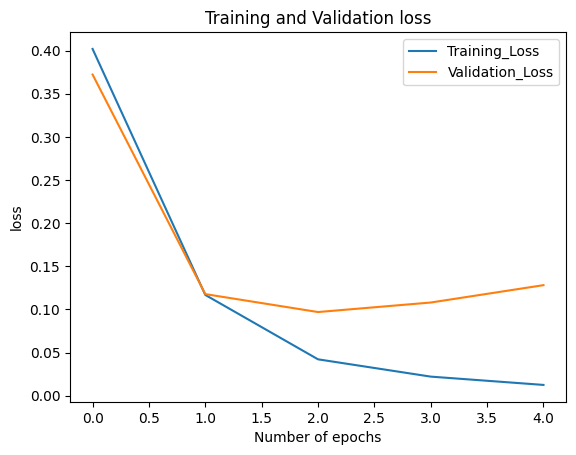

In [43]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')


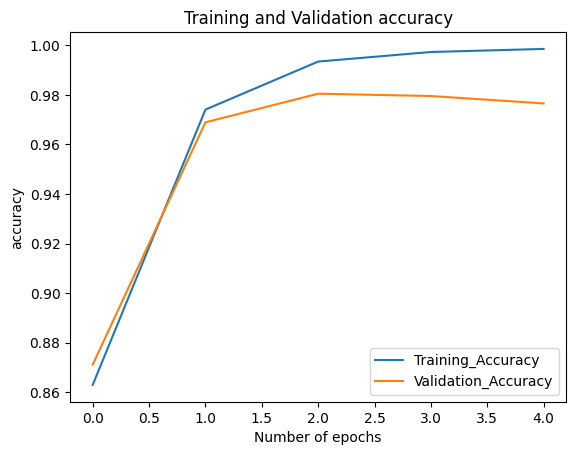

In [44]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')


### Saving the Bi LSTM model

In [45]:
model2.save('BiLSTM.h5')